# A brief introduction to deep learning using Keras

A very simplified view of DL is that it's a multi layer neural network: 
- with convolutional layers at the bottom (or LSTM recurrent elements for uses like NLP, time series) with subsequent layers extracting more detailed and problem specific information
- and a "classical" fully connected NN which makes the decision
See eg. https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53 for a bit of theory

In order to use the example below install a python distribution like Anaconda or install all manually via pip.
Some libs like opencv are not there by default, head to their websites for installation instruction usually you just need to run `conda install something` or specify a repo `conda install -c conda-forge opencv`. 
From my experience it all works out of the box under Linux but you may run into some unsolvable issues related to conda environment under Windows and Mac :/

This example is using the dataset from Aerial Cactus competition https://www.kaggle.com/c/aerial-cactus-identification, please download & unpack the dataset first.

In [3]:
import pandas as pd
import numpy as np

import os
import math

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from keras.models import Model
from keras.layers import Input, Activation
from keras.layers.normalization import BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier
#import autokeras as ak

import matplotlib.pyplot as plt
import matplotlib.image as mpimage
%matplotlib inline

import cv2
from tqdm import tqdm, tqdm_notebook

In [2]:
train_dir = "train"
test_dir = "test"
train_df = pd.read_csv('train.csv')

def read_train_data():
    features = []
    target = []
    images = train_df['id'].values
    for img_id in tqdm_notebook(images):
        features.append(cv2.imread(train_dir + "/" + img_id))    
        target.append(train_df[train_df['id'] == img_id]['has_cactus'].values[0])  

    features = np.asarray(features)
    features = features.astype('float32')
    features /= 255
    target = np.asarray(target)
    return features, target

X_train, y_train = read_train_data()

In [ ]:
# datagen = ImageDataGenerator(rescale=1./255)
# datagen = ImageDataGenerator(rotation_range=40,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         rescale=1./255,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest')

# also see imgaug library

#train_generator = datagen.flow_from_dataframe(dataframe=df, directory="../input/train/train", x_col="id", y_col="has_cactus", class_mode="binary", target_size=(32,32), batch_size=175, shuffle=False)

In [4]:
X_train.shape

(17500, 32, 32, 3)

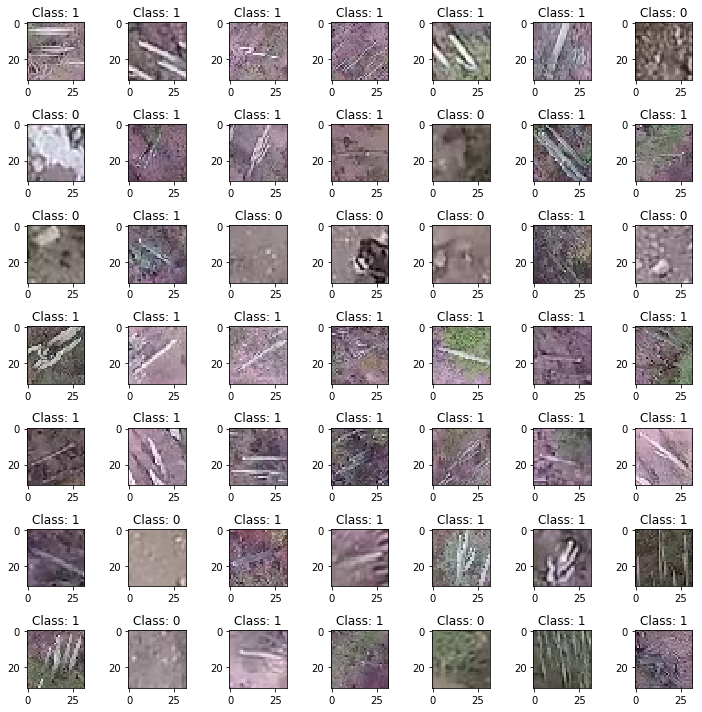

In [5]:
def plot_images_df(df, top=25):  
  plt.figure(figsize=(10, 10))
  for idx in range(top):
    pics_per_row = int(top**.5)
    plt.subplot(pics_per_row, pics_per_row, idx + 1)

    img = mpimage.imread(os.path.join('train', df.iloc[idx].id))
    plt.imshow(img)
    plt.title('Class: {}'.format(df.iloc[idx].has_cactus))

  plt.tight_layout()

plot_images_df(train_df, 49)

In [7]:
input_shape = (32, 32, 3)

model = Sequential([
    Conv2D(64, (3,3), input_shape=input_shape),
    MaxPool2D((2, 2)),
    
    Conv2D(128, (3,3)),
    MaxPool2D((2, 2)),
    
    Conv2D(256, (3,3)),
    MaxPool2D((2, 2)),
    
    Flatten(),
    
    Dense(128, activation='relu'),
    Dropout(.5),
    Dense(1, activation='sigmoid')    
    # If you work on a multi class problem use
    # Dense(num_classes, activation='softmax')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 256)         295168    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
__________

Instructions for updating:
Use tf.cast instead.
Train on 15750 samples, validate on 1750 samples
Epoch 1/5
15750/15750 [==============================] - 19s 1ms/step - loss: 0.1793 - acc: 0.9298 - val_loss: 0.0968 - val_acc: 0.9731
Epoch 2/5
15750/15750 [==============================] - 20s 1ms/step - loss: 0.1072 - acc: 0.9621 - val_loss: 0.1338 - val_acc: 0.9423
Epoch 3/5
15750/15750 [==============================] - 24s 2ms/step - loss: 0.0666 - acc: 0.9742 - val_loss: 0.0528 - val_acc: 0.9846
Epoch 4/5
15750/15750 [==============================] - 19s 1ms/step - loss: 0.0493 - acc: 0.9818 - val_loss: 0.0551 - val_acc: 0.9840
Epoch 5/5
15750/15750 [==============================] - 18s 1ms/step - loss: 0.0387 - acc: 0.9865 - val_loss: 0.0511 - val_acc: 0.9840


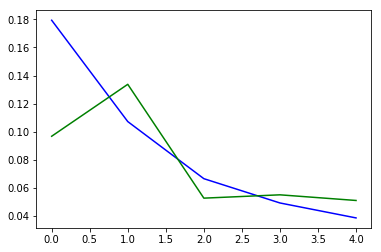

In [5]:
training = model.fit(X_train, y_train, validation_split=0.1, epochs=5)
plt.plot(training.history['loss'], color='b')
plt.plot(training.history['val_loss'], color='g')
plt.show()